In [0]:
import os

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [0]:
from google.colab import files
uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data.csv


In [0]:
import io
data_multi_reg = pd.read_csv(io.BytesIO(uploaded['kc_house_data.csv']))

data_multi_reg.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
data_multi_reg.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [0]:
data_multi_reg.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [0]:
data_multi_reg.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [0]:
data_multi_reg.shape

(21613, 21)

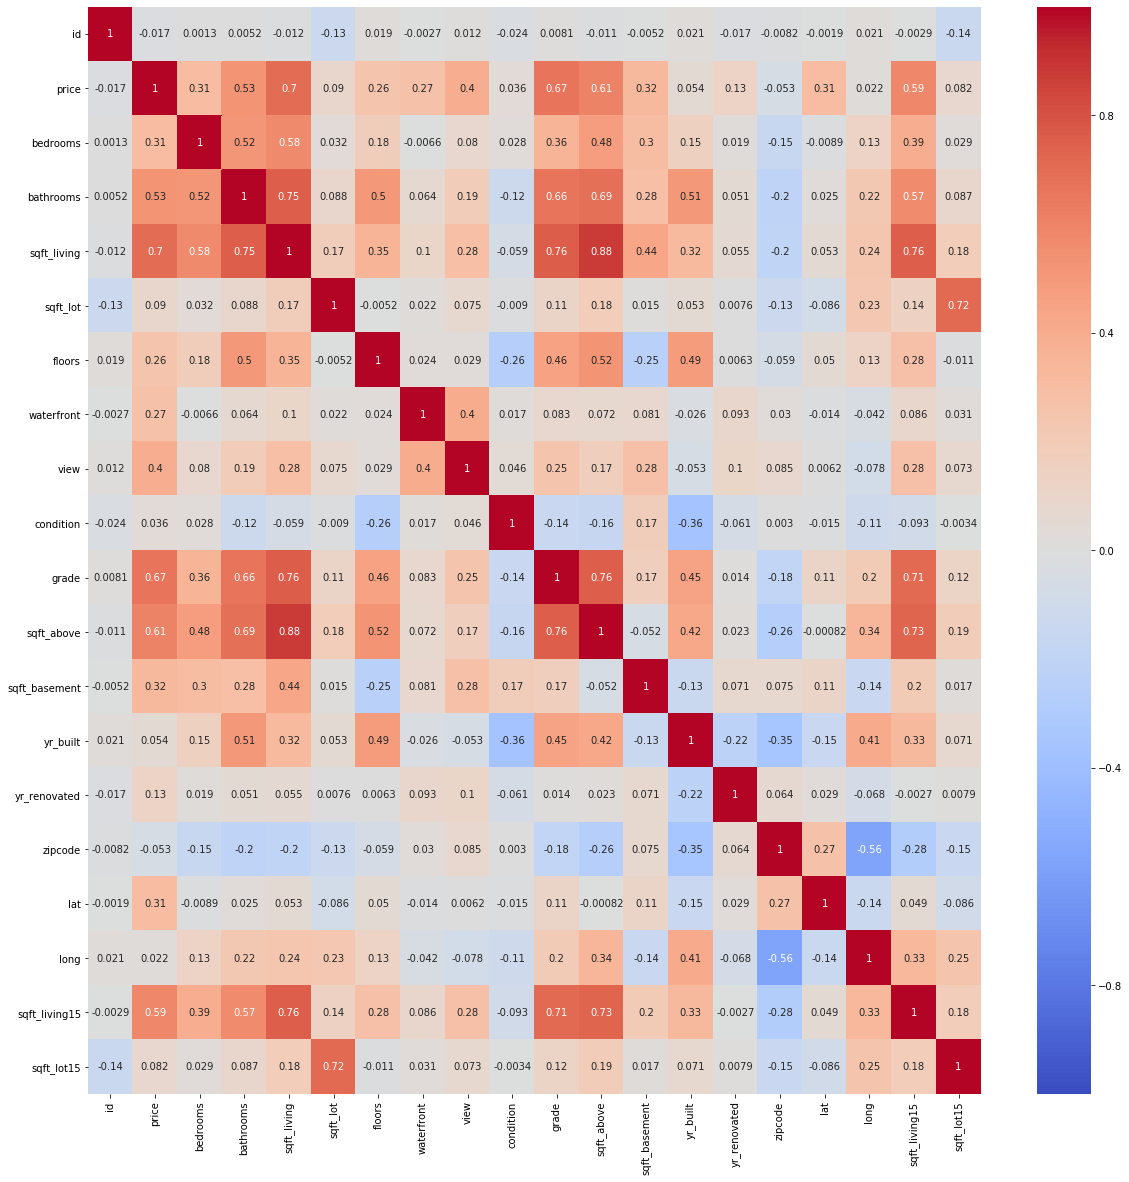

In [0]:
#Correlation Matrix pour trouver le correlations entre les columns
plt.figure(figsize=(20,20))
sns.heatmap(data_multi_reg.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True)
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 

### Analysis intial

### Il y outliers entre living space vs price, donc j'aimerai enlever les outliers aprés refait la visualisation pour voir correlation entre les deux plus claire.

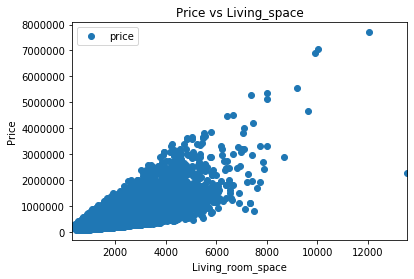

In [0]:
data_multi_reg.plot(x='sqft_living', y='price', style='o')
plt.title('Price vs Living_space')
plt.xlabel('Living_room_space')
plt.ylabel('Price')
plt.show()

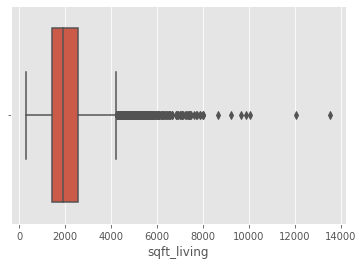

In [0]:
sns.boxplot(x=data_reg['sqft_living'])

In [0]:
data_reg1 = data_multi_reg.copy()

### Enlever les outliers 

In [0]:
from scipy import stats

def drop_numerical_outliers(data_reg1, z_thresh=3):
    # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
    constrains = data_reg1.select_dtypes(include=[np.number]) \
        .apply(lambda x: np.abs(stats.zscore(x)) < z_thresh, reduce=False) \
        .all(axis=1)
    # Drop (inplace) values set to be rejected
    data_reg1.drop(data_reg1.index[~constrains], inplace=True)

In [0]:
drop_numerical_outliers(data_reg1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: The reduce argument is deprecated and will be removed in a future version. You can specify result_type='reduce' to try to reduce the result to the original dimensions
  """


## Aprés enlever des outliers

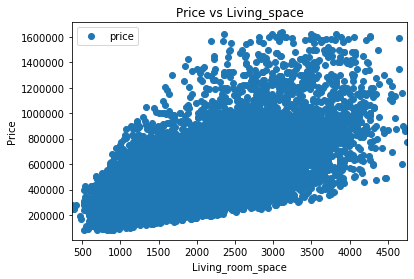

In [0]:
data_reg1.plot(x='sqft_living', y='price', style='o')
plt.title('Price vs Living_space')
plt.xlabel('Living_room_space')
plt.ylabel('Price')
plt.show()

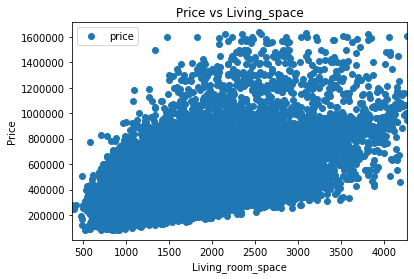

In [0]:
data_reg1.plot(x='sqft_above', y='price', style='o')
plt.title('Price vs Living_space')
plt.xlabel('Living_room_space')
plt.ylabel('Price')
plt.show()

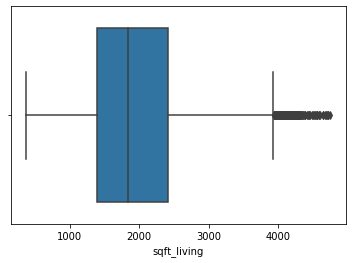

In [0]:
sns.boxplot(x=data_reg1['sqft_living'])

### Je chosi les columns (sqft_living, sqft_above et price) pour fait la multiple regression, parce que il y a un de 70% et 61% correlation entre sqft_living, sqft_above avec price.

### Linear Regresion avec Seaborn et Scikit-Learn

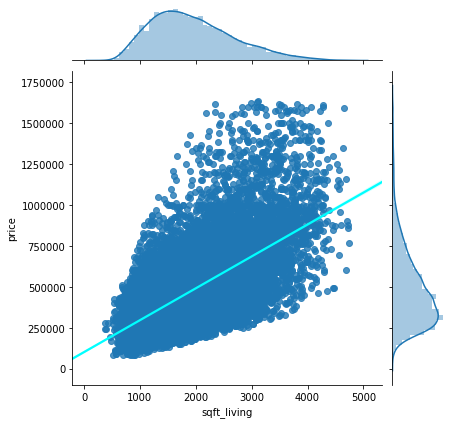

In [0]:

sns.jointplot('sqft_living', # Horizontal axis
           'price',        # Vertical axis
           data=data_reg1, kind = 'reg',
          joint_kws={'line_kws':{'color':'cyan'}})

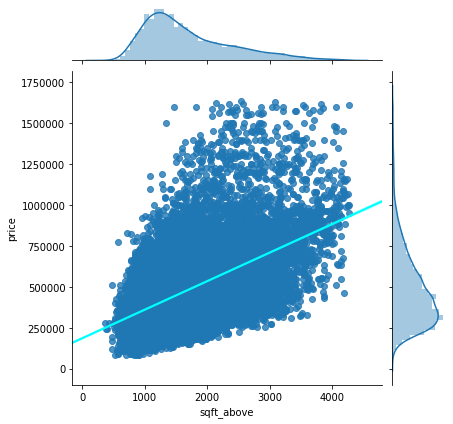

In [0]:
sns.jointplot('sqft_above', # Horizontal axis
           'price',        # Vertical axis
           data=data_reg1, kind = 'reg',
          joint_kws={'line_kws':{'color':'cyan'}})

In [0]:
## Scikit learn multiple regression

X = data_reg1[['sqft_living','sqft_above']]
y = data_reg1['price']

In [0]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
mlr = LinearRegression()  
mlr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#To retrieve the intercept:
print(mlr.intercept_)

#For retrieving the slope:
print(mlr.coef_)

100900.6243238197
[ 1.95111673e+02 -1.62019034e-01]


In [0]:
y_pred = mlr.predict(X)

In [0]:
data_reg_predi = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
data_reg_predi.head(10)

,Actual,Predicted
0,221900.0,330941.216017
2,180000.0,251011.857886
3,604000.0,483149.383440
4,510000.0,428416.043006
6,257500.0,435239.280895
7,291850.0,307547.257540
8,229500.0,448029.282298
9,323000.0,469355.470341
11,468000.0,327090.828648
12,310000.0,379678.629511


In [0]:
data_reg_predi1 = data_reg_predi.head(25)

<function matplotlib.pyplot.show>

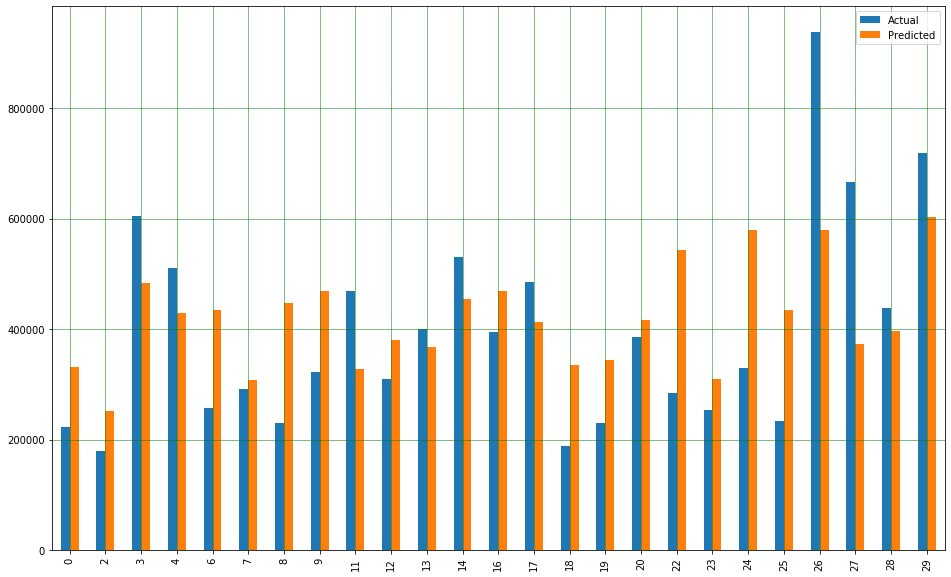

In [0]:
#Bar plot for the top 25 actual and predicted results of price
data_reg_predi1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show